In [1]:
import numpy as np

import time
import sys

from matplotlib import pyplot as plt

In [2]:
from EPT.ept_fullresum_fftw import RVEPT

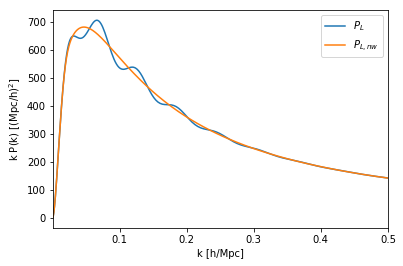

In [3]:
# Run the basic EPT class:
from EPT.moment_expansion_fftw import MomentExpansion

# we scale the z = 0 power spectrum given to give z = 0.8 results
z, D, f = 0.8, 0.6819, 0.8076
k, p = np.loadtxt('pk.dat').T
knw, pnw = np.loadtxt('pnw.dat').T

plt.plot(k, k*p, label=r'$P_L$')
plt.plot(k, k*pnw, label=r'$P_{L,nw}$')
plt.legend()
plt.xlim(1e-3, 0.5)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'k P(k) [(Mpc/h)$^2$]')
plt.show()

In [4]:
start = time.time()
ept = RVEPT(k, D**2*p, D**2*pnw, beyond_gauss=True, one_loop= True, third_order = True,\
                      N = 2000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)
end = time.time()
print(end-start)

1.5433228015899658


In [5]:
# Compare with the regular moment expansion:
from EPT.moment_expansion_fftw import MomentExpansion
start = time.time()
mome = MomentExpansion(k, D**2*p, D**2*pnw, beyond_gauss=True, one_loop= True, third_order = True,\
                      N = 2000, extrap_min=-6, extrap_max=2, cutoff = 100, threads=1)
end = time.time()
print(end-start)

1.1178863048553467


In [6]:
# Default parameters for the halo plots in Chen, Vlah and White (2020)
#sn, sv, s0 = 1380, 3800,  7122
b1, b2, bs, b3 = 1.68593608, -1.17, -0.715, -0.479
sn, sn2, sn4 = 0, 0, 0
alpha0, alpha2, alpha4, alpha6 = 0,0,0,0
#alpha, alphav, alpha0, alpha2 = 16.9, -10.8, 21.0, 5.40

In [7]:
bvec = [b1, b2, bs, b3, alpha0, alpha2, alpha4, alpha6, sn, sn2, sn4]

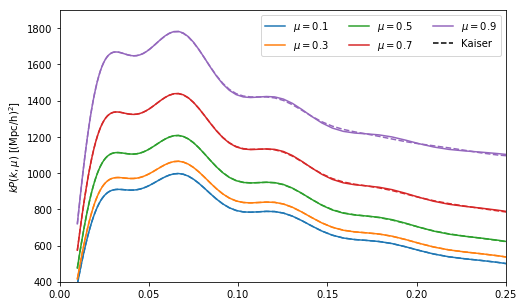

In [8]:
plt.figure(figsize=(8,5))

mus = [0.1, 0.3, 0.5, 0.7, 0.9]


for ii, mu in enumerate(mus):
    
    kw, pw = ept.compute_redshift_space_power_at_mu(bvec,f,mu)
    plt.plot(kw, kw*pw,'C'+str(ii)+'-',label=r'$\mu = %.1f$'%(mu))
    
    kw, pw = mome.compute_redshift_space_power_at_mu(bvec,f,mu,beyond_gauss=True)
    plt.plot(kw, kw*pw,'C'+str(ii)+'--')
    #kw, pw = ept.compute_redshift_space_power_at_mu(bvec,f,0)
    #plt.plot(kw, kw *( (bvec[0] + f*mu**2)**2 / (bvec[0])**2 * (pw-bvec[7]) + bvec[7]),'C'+str(ii)+'--')
    
plt.plot(kw, -1000*kw, 'k--',label='Kaiser')
plt.ylabel(r'$k P(k,\mu)$ [(Mpc/h)$^2$]')


plt.xlim(0,0.25)
plt.ylim(400,1900)

plt.legend(ncol=3,loc='upper right')



plt.show()

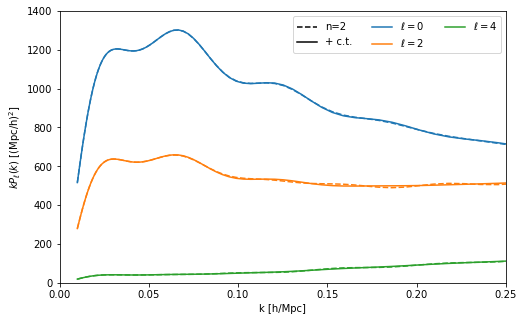

In [10]:
# ... and multipoles
plt.figure(figsize=(8,5))

ks, p0g, p2g, p4g = mome.compute_redshift_space_power_multipoles(bvec,f,beyond_gauss=True,reduced=True)
ks, p0, p2, p4 = ept.compute_redshift_space_power_multipoles(bvec,f)

plt.plot(ks, -1000*ks,'k--',label='n=2')
plt.plot(ks, -1000*ks,'k-',label='+ c.t.')


plt.plot(ks, ks*p0,'C0-',label=r'$\ell = 0$')
plt.plot(ks, ks*p0g,'C0--')

plt.plot(ks, ks*p2,'C1-',label=r'$\ell = 2$')
plt.plot(ks, ks*p2g,'C1--')

plt.plot(ks, ks*p4,'C2-',label=r'$\ell = 4$')
plt.plot(ks, ks*p4g,'C2--')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell(k)$ [(Mpc/h)$^2$]')

plt.xlim(0,0.25)
plt.ylim(0,1400)

plt.legend(ncol=3,loc='upper right')

plt.show()